**IMPORT ALL RELEVANT LIBRARIES**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


**IMPORT DATASET AND PREPROCESS**

In [2]:
data = pd.read_csv('/content/emails.csv', encoding='latin-1')

**SPLIT TRAINING AND TESTING DATA**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['spam'], test_size=0.2,
random_state=42)

**PERFORM VECTORIZATION**

Support Vector Machines (SVM) work with numerical data. Text data needs to be converted into a numerical format that these algorithms can process.
Vectorization helps extract meaningful features from the text. In this case, TF-IDF (Term Frequency-Inverse Document Frequency) vectorization was used, which captures the importanT words.

In [4]:
tfidf_vectorizer = TfidfVectorizer()
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

In [5]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

**ANALYSIS AND CONFUSION MATRIX**

In [6]:
svm_pred = svm_classifier.predict(X_test_vectorized)

svm_accuracy = accuracy_score(y_test, svm_pred)
print("\nSVM Accuracy:", svm_accuracy)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.9947643979057592

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.99      0.99      0.99       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



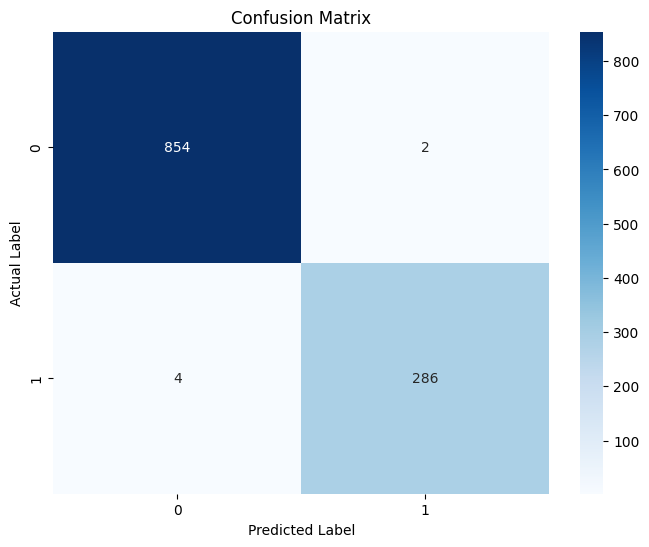

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**TESTING**

In [16]:
def email_classifier(email):
    vectorized_data = tfidf_vectorizer.transform([email])
    svm_prediction = svm_classifier.predict(vectorized_data)

    print("Prediction:", "Spam" if svm_prediction[0] == 1 else "Not Spam")


email = "Hi. We are thrilled to inform you that you've won the lottery. Contact 01234567 with 20$ to claim the prize!"
email_classifier(email)

email1 = "Hi, Looking forward to seeing you at the party."
email_classifier(email1)

Prediction: Spam
Prediction: Not Spam
